### <center> CIFAR 10 using ANN and CNN

Lesson from: https://www.youtube.com/watch?v=7HPwo4wnJeA

### The CIFAR-10 dataset consists of 60,000 color images, each of size 32x32 pixels, categorized into 10 different classes. Each class represents a specific object or category. The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

### The dataset is divided into two subsets: a training set and a test set. The training set contains 50,000 images, while the test set contains 10,000 images. These images are pre-labeled with their corresponding class labels.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

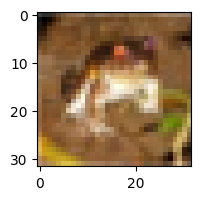

In [6]:
plt.figure(figsize=[15,2]) # Figure size
plt.imshow(X_train[0])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

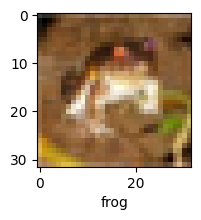

In [12]:
plot_sample(X_train, y_train, 0)

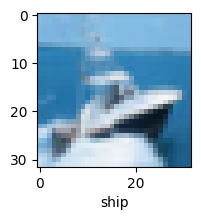

In [14]:
plot_sample(X_train, y_train, 8)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [16]:
#Use sparse categorical entropy if labels are just numbers not one-hot encoded vectors. 
# Epochs 5
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8074 - accuracy: 0.3576
Epoch 2/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6175 - accuracy: 0.4302
Epoch 3/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5371 - accuracy: 0.4603
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4770 - accuracy: 0.4803
Epoch 5/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4290 - accuracy: 0.4978


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [17]:
# Evaluation on test dataset
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.5802 - accuracy: 0.4368


[1.5801985263824463, 0.4368000030517578]

In [18]:
#10 epochs
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8111 - accuracy: 0.3575
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6245 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5411 - accuracy: 0.4566
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4802 - accuracy: 0.4798
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4314 - accuracy: 0.4958
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3906 - accuracy: 0.5098
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3520 - accuracy: 0.5243
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.3168 - accuracy: 0.5381
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2814 - accuracy: 0.5491
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [19]:
# Evaluation on test dataset
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3472 - accuracy: 0.5256


[1.3472181558609009, 0.525600016117096]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      1000
           1       0.56      0.75      0.64      1000
           2       0.40      0.43      0.42      1000
           3       0.39      0.32      0.35      1000
           4       0.61      0.23      0.34      1000
           5       0.46      0.39      0.42      1000
           6       0.48      0.74      0.58      1000
           7       0.52      0.69      0.59      1000
           8       0.71      0.60      0.65      1000
           9       0.63      0.51      0.56      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.51     10000
weighted avg       0.53      0.53      0.51     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

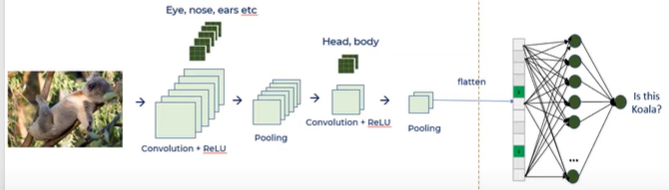

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5216 - accuracy: 0.8162
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4884 - accuracy: 0.8280
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4523 - accuracy: 0.8402
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4173 - accuracy: 0.8531
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3914 - accuracy: 0.8613
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3613 - accuracy: 0.8730
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3298 - accuracy: 0.8839
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3115 - accuracy: 0.8897
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.2820 - accuracy: 0.8992
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [39]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9827 - accuracy: 0.6835


[0.9827497005462646, 0.6834999918937683]

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.2475 - accuracy: 0.9115 - val_loss: 1.5566 - val_accuracy: 0.6820
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2312 - accuracy: 0.9175 - val_loss: 1.6057 - val_accuracy: 0.6723
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.2153 - accuracy: 0.9232 - val_loss: 1.6932 - val_accuracy: 0.6701
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2000 - accuracy: 0.9283 - val_loss: 1.7945 - val_accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.1874 - accuracy: 0.9329 - val_loss: 1.8094 - val_accuracy: 0.6739
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.1768 - accuracy: 0.9360 - val_loss: 1.9075 - val_accuracy: 0.6716
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.1653 - accuracy: 0.9413 - val_loss: 1.9600 -

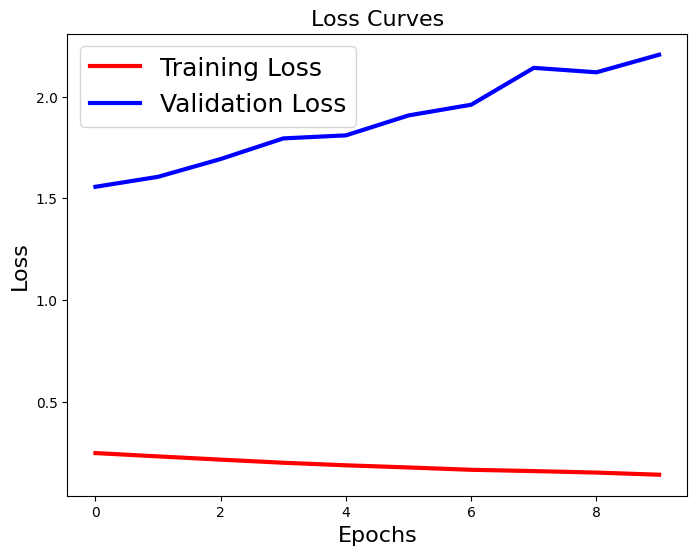

In [41]:
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the loss curve
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

# Training loss decreased with epochs but not validation data and hence it led to overfitting problem. We may use dropout to regularize. 

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer here
    
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

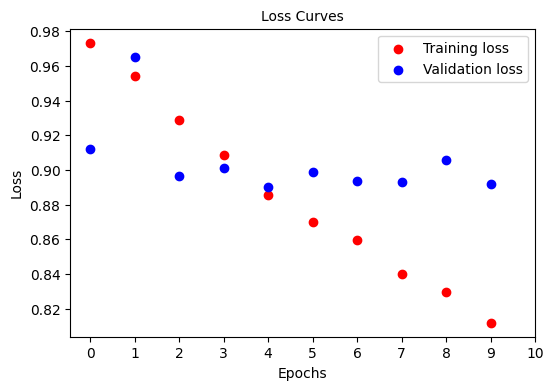

In [47]:
plt.figure(figsize=[6,4])
plt.scatter(range(len(history.history['loss'])), history.history['loss'], color='r', marker='o', label='Training loss')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], color='b', marker='o', label='Validation loss')
plt.legend(fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=10)
plt.xticks(range(11))  # Set x-axis ticks from 0 to 10
plt.show()

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[5.0406461e-04, 3.1173346e-04, 6.7885901e-04, 8.5262984e-01,
        3.6059948e-05, 1.4169361e-01, 2.0754125e-03, 4.6143127e-06,
        2.0289517e-03, 3.6872018e-05],
       [9.7083510e-04, 9.9752180e-02, 1.2204245e-07, 2.4463542e-09,
        3.9659356e-09, 3.3042322e-10, 3.7089187e-09, 8.4338153e-12,
        8.9926749e-01, 9.3716890e-06],
       [6.5391816e-02, 2.1889907e-01, 1.2108230e-03, 3.9863470e-03,
        1.4440898e-03, 9.3889260e-04, 4.7496822e-05, 7.4160687e-04,
        6.7598015e-01, 3.1359721e-02],
       [9.0177310e-01, 1.9020835e-02, 1.9183658e-03, 7.7968005e-05,
        5.4539842e-06, 1.3122284e-06, 2.6754427e-04, 6.3635844e-06,
        7.6856673e-02, 7.2406583e-05],
       [1.7854465e-07, 3.0016729e-06, 9.7191343e-03, 4.3097809e-02,
        6.1093235e-01, 1.2044355e-03, 3.3499455e-01, 7.0381175e-06,
        2.8885244e-05, 1.2668406e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

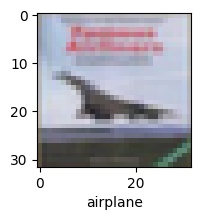

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'

In [31]:
classes[y_classes[3]]

'airplane'